# Time Series Forecasting for Petroleum Engineers

## Time series forecasting is the process of using statistical models and algorithms to predict future values based on historical data. 

## In the field of petroleum engineering, time series forecasting can be used to predict the demand for oil and gas, the evolution of prices, and the production of wells. This tutorial aims to provide petroleum engineering graduate students with an overview of the evolution of time series forecasting techniques and their current capabilities.

# There are limits to any period length, what are they?

## The longest period is the cycle of Universe expansion and contraction, which is 40 billion years.  We are currently 13.7 billion years into a 20 billion year expansion (big-bang), followed by a contraction period (big-crunch).


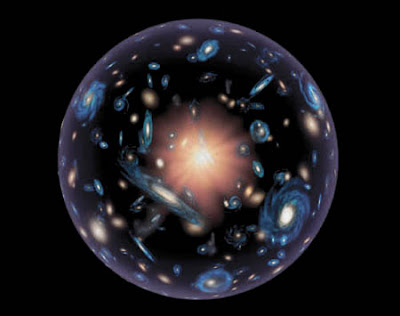

## The longest cycle of interest would be 1/2 of the Universal cycle or 20 billion years.
## The shortest cycle of interest would the amount of time it takes a photon to pass through a molecule of hydrogen, 247 zepto seconds: 0.000000000000000000247 seconds.

## It was an error of Roger Penrose, Stephen Hawkings mentor, that the Universe came from nothing.  The current big bang occured after a previous big crunch.  The Universe expands and contracts continuously, with each new Big Bang being an octave higher in frequency than the previous.
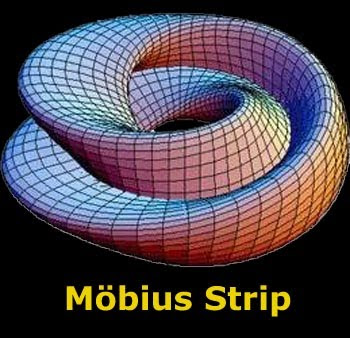

# Historical Methods

## In the early days of time series forecasting, simple methods such as moving averages and exponential smoothing were used. These methods were based on the assumption that the future would be similar to the past, and the forecast was simply the average of the previous values. While these methods were useful for simple trends, they were limited in their ability to capture more complex patterns in the data.

### Let's borrow some data from here: https://github.com/Jeffalltogether/well_decline_curve_analysis/blob/master/data/Production_Time_Series.CSV

In [1]:
# In this example, file_path is the path to the CSV file that you want to load into a dataframe. 
# The pd.read_csv function reads the file and returns a Pandas dataframe, which is stored in the variable df. 
# The function returns the df dataframe, so you can use it in your code.

import pandas as pd

def load_csv_to_df(file_path):
    df = pd.read_csv(file_path)
    return df

In [2]:
file_path = './well_decline/Production_Time_Series.CSV'
df = load_csv_to_df(file_path)

In [3]:
df

,Entity ID,API/UWI,API/UWI List,Production Date,Liquid (bbl),Gas (mcf),Water (bbl),Well Count,Days
0,130029764,42461404170000,NaN,2017-05-01,490,424,884.0,1,NaN
1,130029764,42461404170000,NaN,2017-06-01,4749,5619,8568.0,1,NaN
2,130029764,42461404170000,NaN,2017-07-01,18608,25625,33574.0,1,NaN
3,130029764,42461404170000,NaN,2017-08-01,18787,16374,33897.0,1,NaN
4,130029764,42461404170000,NaN,2017-09-01,22337,37051,40302.0,1,NaN
...,...,...,...,...,...,...,...,...,...
4093,-196381,42461404550000,4.246140e+11,2017-09-01,7773,7632,NaN,1,NaN
4094,-196381,42461404550000,4.246140e+11,2017-10-01,5910,5296,NaN,1,NaN
4095,-196381,42461404550000,4.246140e+11,2017-11-01,8055,16310,NaN,1,NaN
4096,-196381,42461404550000,4.246140e+11,2017-12-01,3694,2197,NaN,1,NaN


In [4]:
print(df.dtypes)

Entity ID            int64
API/UWI              int64
API/UWI List       float64
Production Date     object
Liquid (bbl)         int64
Gas (mcf)            int64
Water (bbl)        float64
Well Count           int64
Days               float64
dtype: object


In [5]:
df['Production Date'] = pd.to_datetime(df['Production Date'], format='%Y-%m-%d')
df['Crude'] = df['Liquid (bbl)'] - df['Water (bbl)']

In [6]:
print(df.dtypes)

Entity ID                   int64
API/UWI                     int64
API/UWI List              float64
Production Date    datetime64[ns]
Liquid (bbl)                int64
Gas (mcf)                   int64
Water (bbl)               float64
Well Count                  int64
Days                      float64
Crude                     float64
dtype: object


In [7]:
# What are all of the different well APIs in the data set?
# Here's an example of a Python function that takes a dataframe and a column name as input 
# and returns a list of all the unique values in the specified column
def get_unique_values(df, column_name):
    unique_values = df[column_name].unique().tolist()
    return unique_values

In [8]:
APIs = get_unique_values(df, 'API/UWI')
APIs

[42461404170000,
 42461404590000,
 42461404330000,
 42461403720000,
 42461403730000,
 42461404090000,
 42461404540000,
 42461404100000,
 42461403880000,
 42461403680000,
 42461404580000,
 42461404320000,
 42461404550000,
 42461404530000,
 42461403690000,
 42461403700000,
 42461404070000,
 42461404110000,
 42461403800000,
 42461403740000,
 42461403570000,
 42461403490000,
 42461403480000,
 42461403200000,
 42461403190000,
 42461403170000,
 42461402630000,
 42461404180000,
 42461403130000,
 42461403120000,
 42461402430000,
 42461402390000,
 42461402460000,
 42461402400000,
 42461402470000,
 42461401960000,
 42461401950000,
 42461401660000,
 42461402440000,
 42461401900000,
 42461402090000,
 42461402080000,
 42461401940000,
 42461401930000,
 42461401650000,
 42461400180000,
 42461400150000,
 42461400140000,
 42461401510000,
 42461401200000,
 42461400130000,
 42461401730000,
 42461401520000,
 42461401190000,
 42461400170000,
 42461400160000,
 42461398850000,
 42461401140000,
 4246140113000

In [9]:
# Lets plot Liquid (crude), Gas, and Water for a specified API
# Here is an example of a Python function that takes a dataframe and a value of API/UWI as input 
# and plots the values of Liquid (bbl), Gas (mcf), Water (bbl) by Production Date for the specified API/UWI
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource

def plot_production(df, api_uwi):
    api_df = df[df['API/UWI'] == api_uwi]
    source = ColumnDataSource(api_df)
    p = figure(x_axis_label='Production Date', y_axis_label='Production (bbl or mcf)', 
               title=f'Production for API/UWI {api_uwi}')
    p.line(x='Production Date', y='Crude', source=source, color='brown', legend_label='Crude')
    p.line(x='Production Date', y='Gas (mcf)', source=source, color='orange', legend_label='Gas')
    p.line(x='Production Date', y='Water (bbl)', source=source, color='blue', legend_label='Water')
    p.legend.location = 'top_left'
    show(p)

In [10]:
plot_production(df, 42461404590000)

In [11]:
# Lets plot the average, moving average, and exponential moving averages

def add_liquid_averages(df):
    api_uwis = df['API/UWI'].unique()
    avg_liquid = []
    sma_liquid = []
    ema_liquid = []
    for i, row in df.iterrows():
        api_uwi = row['API/UWI']
        api_df = df[df['API/UWI'] == api_uwi]
        avg_liquid.append(api_df['Liquid (bbl)'].mean())
        sma_liquid.append(api_df['Liquid (bbl)'].rolling(window=3).mean().iloc[-1])
        ema_liquid.append(api_df['Liquid (bbl)'].ewm(span=3).mean().iloc[-1])
    df['AVG Liquid'] = avg_liquid
    df['SMA Liquid'] = sma_liquid
    df['EMA Liquid'] = ema_liquid
    return df

In [12]:
df_avg = add_liquid_averages(df)
df_avg

,Entity ID,API/UWI,API/UWI List,Production Date,Liquid (bbl),Gas (mcf),Water (bbl),Well Count,Days,Crude,AVG Liquid,SMA Liquid,EMA Liquid
0,130029764,42461404170000,NaN,2017-05-01,490,424,884.0,1,NaN,-394.0,13194.285714,16575.333333,14555.307087
1,130029764,42461404170000,NaN,2017-06-01,4749,5619,8568.0,1,NaN,-3819.0,13194.285714,16575.333333,14555.307087
2,130029764,42461404170000,NaN,2017-07-01,18608,25625,33574.0,1,NaN,-14966.0,13194.285714,16575.333333,14555.307087
3,130029764,42461404170000,NaN,2017-08-01,18787,16374,33897.0,1,NaN,-15110.0,13194.285714,16575.333333,14555.307087
4,130029764,42461404170000,NaN,2017-09-01,22337,37051,40302.0,1,NaN,-17965.0,13194.285714,16575.333333,14555.307087
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4093,-196381,42461404550000,4.246140e+11,2017-09-01,7773,7632,NaN,1,NaN,NaN,9343.312500,5886.333333,5743.488563
4094,-196381,42461404550000,4.246140e+11,2017-10-01,5910,5296,NaN,1,NaN,NaN,9343.312500,5886.333333,5743.488563
4095,-196381,42461404550000,4.246140e+11,2017-11-01,8055,16310,NaN,1,NaN,NaN,9343.312500,5886.333333,5743.488563
4096,-196381,42461404550000,4.246140e+11,2017-12-01,3694,2197,NaN,1,NaN,NaN,9343.312500,5886.333333,5743.488563


# Classical Methods
## As time passed, more sophisticated methods were developed, including ARIMA (AutoRegressive Integrated Moving Average) and SARIMA (Seasonal AutoRegressive Integrated Moving Average). These methods allowed for the modeling of trends, seasonality, and residual errors, making them better suited for capturing complex patterns in the data. Additionally, they were able to handle missing values and handle non-stationary data.

## Autoregression

The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.

The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model.

The method is suitable for univariate time series without trend and seasonal components.

In [13]:
# AR example
from statsmodels.tsa.ar_model import AutoReg

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [14]:
df_well = df_avg[df_avg['API/UWI'] == 42461404590000]
df_well

,Entity ID,API/UWI,API/UWI List,Production Date,Liquid (bbl),Gas (mcf),Water (bbl),Well Count,Days,Crude,AVG Liquid,SMA Liquid,EMA Liquid
7,129978216,42461404590000,4.246140e+11,2017-05-01,20346,16404,18201.0,1,NaN,2145.0,16584.875,11863.0,11822.156863
8,129978216,42461404590000,4.246140e+11,2017-06-01,23626,20064,21135.0,1,NaN,2491.0,16584.875,11863.0,11822.156863
9,129978216,42461404590000,4.246140e+11,2017-07-01,20115,18927,17994.0,1,NaN,2121.0,16584.875,11863.0,11822.156863
10,129978216,42461404590000,4.246140e+11,2017-08-01,17598,19239,15742.0,1,NaN,1856.0,16584.875,11863.0,11822.156863
11,129978216,42461404590000,4.246140e+11,2017-09-01,15405,19782,13781.0,1,NaN,1624.0,16584.875,11863.0,11822.156863
12,129978216,42461404590000,4.246140e+11,2017-10-01,13707,17985,12262.0,1,NaN,1445.0,16584.875,11863.0,11822.156863
13,129978216,42461404590000,4.246140e+11,2017-11-01,11878,13822,10625.0,1,NaN,1253.0,16584.875,11863.0,11822.156863
14,129978216,42461404590000,4.246140e+11,2017-12-01,10004,13965,8949.0,1,NaN,1055.0,16584.875,11863.0,11822.156863


In [15]:
data = df_well['Crude'].values
data

array([2145., 2491., 2121., 1856., 1624., 1445., 1253., 1055.])

In [16]:
# fit model
model = AutoReg(data, lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[881.40278044]


## ARIMA: Autoregressive Integrated Moving Average

The Autoregressive Integrated Moving Average (ARIMA) method models the next step in the sequence as a linear function of the differenced observations and residual errors at prior time steps.

It combines both Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the sequence to make the sequence stationary, called integration (I).

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function, e.g. ARIMA(p, d, q). An ARIMA model can also be used to develop AR, MA, and ARMA models.

The method is suitable for univariate time series with trend and without seasonal components.  

The parameters (p, d, q) control the model's behavior and are used to capture the underlying patterns and relationships in the data.

Here's what each parameter represents:

p: The number of autoregressive (AR) terms. This parameter represents the number of previous time steps (lags) used to predict the next value in the series. For example, if p=2, the model will use the values from two time steps prior to make its prediction.

d: The number of differences required to make the time series stationary. This parameter represents the number of times the series must be differenced to remove any trend or seasonality. For example, if d=1, the difference between consecutive values in the series will be taken once to make the data stationary.

q: The number of moving average (MA) terms. This parameter represents the number of residual errors used to predict the next value in the series. For example, if q=2, the model will use the residual errors from two previous predictions to make the next prediction.

Think of a petroleum engineer who is trying to forecast the production of oil wells. They might use an ARIMA(1,1,0) model, which means they would use the previous well production to predict the next value, difference the data once to remove any trend, and not use any residual errors in their prediction.

In [17]:
# ARIMA example
from statsmodels.tsa.arima.model import ARIMA
# fit model
model = ARIMA(data, order=(2, 2, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)

[857.00000685]


C:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


## SARIMA: Seasonal Autoregressive Integrated Moving-Average

The Seasonal Autoregressive Integrated Moving Average (SARIMA) method models the next step in the sequence as a linear function of the differenced observations, errors, differenced seasonal observations, and seasonal errors at prior time steps.

It combines the ARIMA model with the ability to perform the same autoregression, differencing, and moving average modeling at the seasonal level.

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function and AR(P), I(D), MA(Q) and m parameters at the seasonal level, e.g. SARIMA(p, d, q)(P, D, Q, m)  where “m” is the number of time steps in each season (the seasonal period). A SARIMA model can be used to develop AR, MA, ARMA and ARIMA models.

The method is suitable for univariate time series with trend and/or seasonal components.

In [18]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX
# fit model
model = SARIMAX(data, order=(3, 2, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[762.69368425]


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

The Seasonal Autoregressive Integrated Moving Average (SARIMA) method models the next step in the sequence as a linear function of the differenced observations, errors, differenced seasonal observations, and seasonal errors at prior time steps.

It combines the ARIMA model with the ability to perform the same autoregression, differencing, and moving average modeling at the seasonal level.

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function and AR(P), I(D), MA(Q) and m parameters at the seasonal level, e.g. SARIMA(p, d, q)(P, D, Q)m where “m” is the number of time steps in each season (the seasonal period). A SARIMA model can be used to develop AR, MA, ARMA and ARIMA models.

The method is suitable for univariate time series with trend and/or seasonal components.

In [19]:
data2 = df_well['Crude'].values
data2

array([2145., 2491., 2121., 1856., 1624., 1445., 1253., 1055.])

In [20]:
# fit model
model = SARIMAX(data, exog=data2, order=(3, 2, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
# is this a good assumption?
exog2 = data2[-1]
yhat = model_fit.predict(len(data), len(data), exog=[exog2])
print(yhat)

[1055.]


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [21]:
# what is we use SARMIA for data2 prediction?
model = SARIMAX(data2, order=(3, 2, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
yhat2 = model_fit.predict(len(data2), len(data2))
print(yhat2)

[762.69368425]


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
# fit model with updated data2 prediction
model = SARIMAX(data, exog=data2, order=(3, 2, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
# is this a good assumption?
exog2 = yhat2
yhat = model_fit.predict(len(data), len(data), exog=[exog2])
print(yhat)

[762.69368425]


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## VAR: Vector Autoregression

The Vector Autoregression (VAR) method models the next step in each time series using an AR model. It is the generalization of AR to multiple parallel time series, e.g. multivariate time series.

The notation for the model involves specifying the order for the AR(p) model as parameters to a VAR function, e.g. VAR(p).

The method is suitable for multivariate time series without trend and seasonal components.

In [23]:
# VAR example
from statsmodels.tsa.vector_ar.var_model import VAR

In [24]:
multivariate_data = list()
data = df_well['Crude'].values
data2 = df_well['Gas (mcf)'].values
data3 = df_well['Water (bbl)'].values

for i in range(len(data)):
    v1 = data[i]
    v2 = data2[i]
    v3 = data3[i]
    row = [v1, v2, v3]
    multivariate_data.append(row)

In [25]:
# fit model
model = VAR(multivariate_data)
model_fit = model.fit()
# make prediction
yhat = model_fit.forecast(model_fit.endog, steps=1)
print(yhat)

[[ 1066.39049038 13292.50670308  9044.86419381]]


## VARMA: Vector Autoregression Moving-Average

The Vector Autoregression Moving-Average (VARMA) method models the next step in each time series using an ARMA model. It is the generalization of ARMA to multiple parallel time series, e.g. multivariate time series.

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to a VARMA function, e.g. VARMA(p, q). A VARMA model can also be used to develop VAR or VMA models.

The method is suitable for multivariate time series without trend and seasonal components.

In [26]:
from statsmodels.tsa.statespace.varmax import VARMAX
# fit model
model = VARMAX(multivariate_data, order=(1, 0))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast()
print(yhat)

[[ 1154.2711955  13401.69832295  9792.45952858]]


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## VARMAX: Vector Autoregression Moving-Average with Exogenous Regressors

The Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX) is an extension of the VARMA model that also includes the modeling of exogenous variables. It is a multivariate version of the ARMAX method.

Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series(es) are referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).

The VARMAX method can also be used to model the subsumed models with exogenous variables, such as VARX and VMAX.

The method is suitable for multivariate time series without trend and seasonal components with exogenous variables.

In [27]:
data_exog = data2
# fit model
model = VARMAX(multivariate_data, exog=data_exog, order=(1, 0))
model_fit = model.fit(disp=False)
# make prediction
data_exog2 = yhat2
yhat = model_fit.forecast(exog=data_exog2)
print(yhat)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


[[ -19778.94261843     741.38936479 -297833.24504497]]


## SES: Simple Exponential Smoothing

The Simple Exponential Smoothing (SES) method models the next time step as an exponentially weighted linear function of observations at prior time steps.

The method is suitable for univariate time series without trend and seasonal components.

In [28]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# fit model
model = SimpleExpSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[1055.00000295]


## HWES: Holt Winter’s Exponential Smoothing

The Holt Winter’s Exponential Smoothing (HWES) also called the Triple Exponential Smoothing method models the next time step as an exponentially weighted linear function of observations at prior time steps, taking trends and seasonality into account.

The method is suitable for univariate time series with trend and/or seasonal components

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[1055.00000295]


# Machine Learning Methods
## With the advent of powerful computers and the increasing availability of data, machine learning methods have become increasingly popular for time series forecasting. Some popular machine learning methods include artificial neural networks, random forests, and gradient boosting. These methods have the advantage of being able to capture complex patterns in the data and can be used for multivariate time series forecasting, where multiple variables are used to make predictions.

## LSTM

An LSTM (Long Short-Term Memory) model is a type of recurrent neural network that is designed to handle the problem of long-term dependencies in sequential data. In the context of predicting well crude volumes, an LSTM model can be used to analyze time series data of previous well production volumes and various other related features (such as pressure, temperature, etc.) to make future predictions.

Here's how an LSTM model for this problem might work:

Input layer: This layer takes in the time series data and various other relevant features as input to the network.

LSTM layer: This layer is the core of the LSTM model, and is responsible for analyzing the input data and retaining important information from the past.

Output layer: This layer outputs the predicted well crude volume for a given time step, based on the analysis performed by the LSTM layer.

The LSTM layer is trained using supervised learning, where the model is given a set of input/output pairs (previous well production volumes and the corresponding well crude volume) and the goal is to learn a mapping from inputs to outputs. Once trained, the model can be used to make predictions on new, unseen data.

Overall, LSTMs are a powerful tool for handling time series data and are well-suited for problems like predicting well crude volumes, where long-term dependencies and patterns in the data are important factors.

In [42]:
import torch
import torch.nn as nn

# Define the input array
input_array = torch.tensor([2145., 2491., 2121., 1856., 1624., 1445., 1253., 1055.])

# Define the model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, input):
        output, (hn, cn) = self.lstm(input)
        output = self.fc(output[-1, :, :])
        return output

In [43]:
# Initialize the model
model = LSTM(1, 8, 1)

# Define the loss function and optimization algorithm
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [44]:
# Train the model
for epoch in range(100):
    input_sequence = input_array[:-1].unsqueeze(0).unsqueeze(-1)
    target = input_array[1:].unsqueeze(0).unsqueeze(-1)
    output = model(input_sequence)
    loss = criterion(output, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

C:\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 7, 1])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [45]:
# Use the model to predict the next value in the input array
with torch.no_grad():
    input_sequence = input_array[-7:].unsqueeze(0).unsqueeze(-1)
    predicted_value = model(input_sequence)
    print("The predicted value is:", predicted_value[0][-1].item())

The predicted value is: 1690.3873291015625


# Conclusion
## Time series forecasting has come a long way since its early days, with advancements in computational power and data availability allowing for the development of increasingly sophisticated methods. Petroleum engineering graduate students should have an understanding of the evolution of time series forecasting methods and their current capabilities, as this knowledge will be useful in their work as petroleum engineers.

# Novel methods

## Deep Time-Index Meta-Learning for Non-Stationary Time-Series Forecasting (Salesforce R&D)
### https://github.com/fastflair/DeepTime/tree/main

## Generative Time Series Forecasting with diffusion, denoise, and disentanglement
### https://github.com/PaddlePaddle/PaddleSpatial/tree/main/research/D3VAE

## Temporal Fusion Transformer
### https://github.com/BLarzalere/Temporal-Fusion-Transformer

